<a href="https://colab.research.google.com/github/jihankaruniaa/PCVK_Ganjil_2024/blob/main/Modul_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRAKTIKUM

### Akses folder images pada Google Drive Anda dengan kode berikut:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Transformasi Linier Brightness
Formula : *g(x,y) = f(x,y)+b*

*g(x,y)* adalah nilai pixel setelah transformasi, *f(x,y)* adalah nilai pixel asli, *b* adalah nilai brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


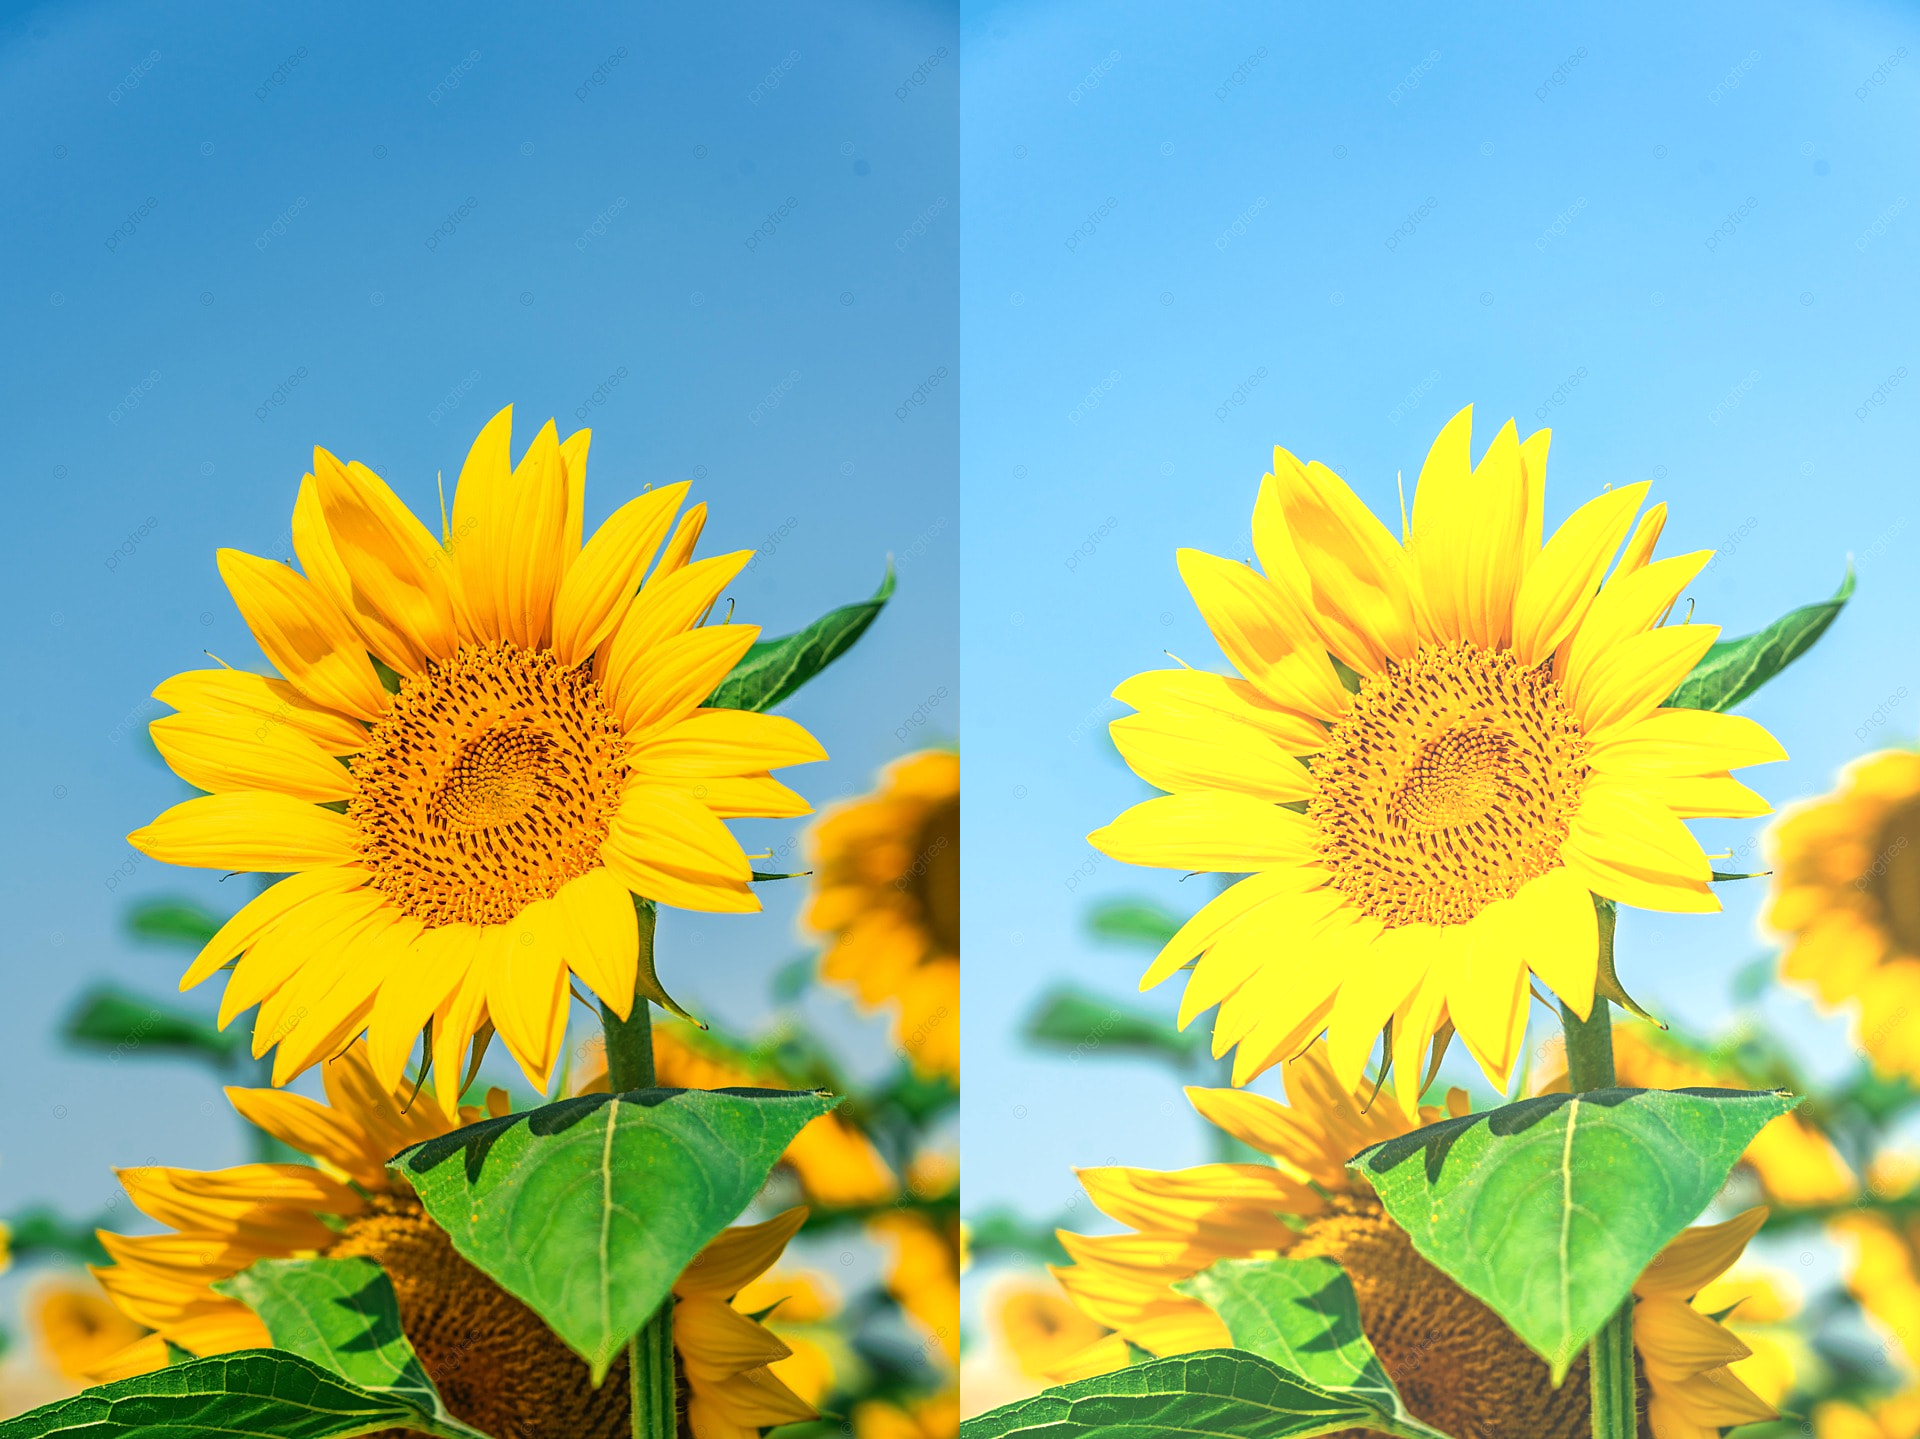

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/sunflow.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


##  TUGAS PRAKTIKUM

1.  Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

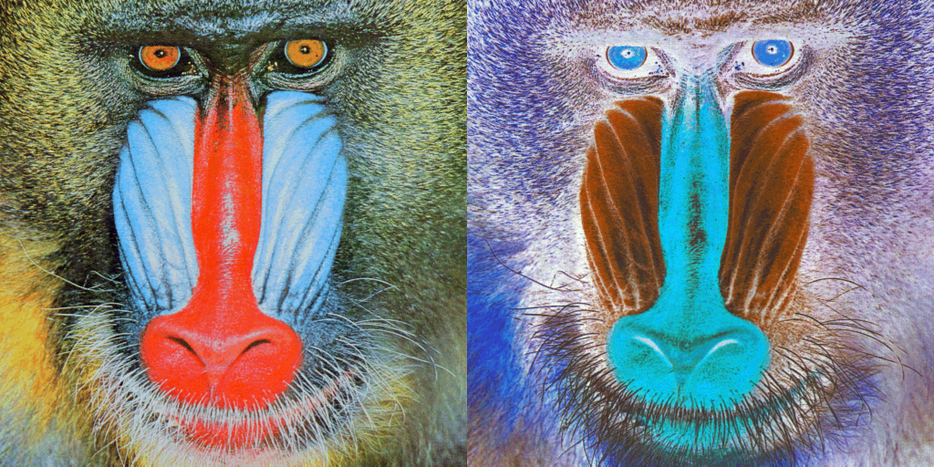

In [13]:
original = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/imageM3.png')

#menghitung citra negatif/inverse dengan rumus g(x) = 255 - f(x)
inverse_image = 255 - original

#menampilkan citra asli dan inverse
final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras


 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


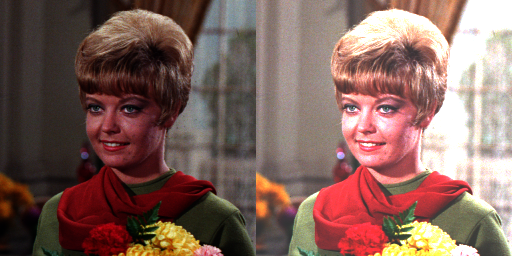

In [20]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/female.tiff')

contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


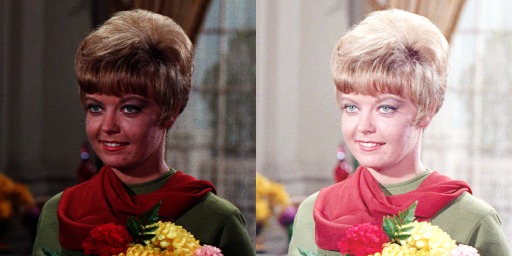

In [22]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/female.tiff')
brightness_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + img[y,x,c])), 0 , 255)

final_frame = cv.hconcat((img, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

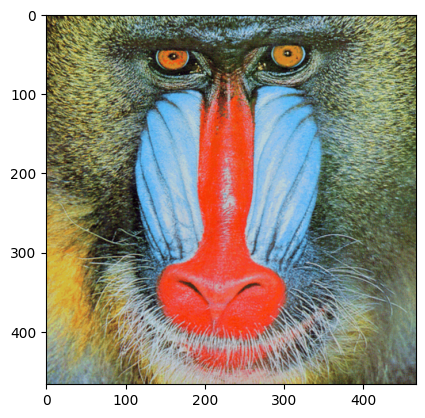

In [4]:
img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/imageM3.png')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

 - Averaging

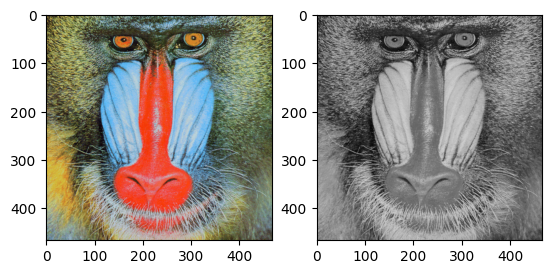

In [5]:
img_avg = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/imageM3.png')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

  - Lightness

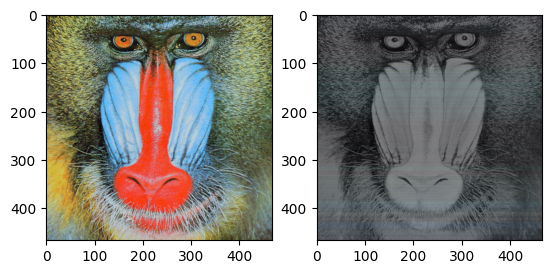

In [6]:
img_light = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/imageM3.png')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

  - Luminance


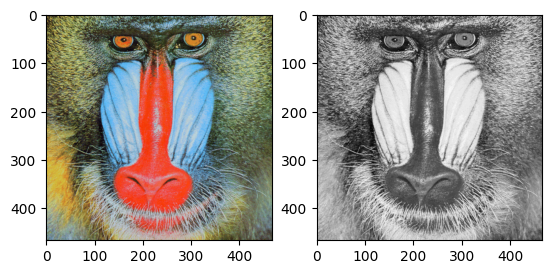

In [7]:
img_lum = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/imageM3.png')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

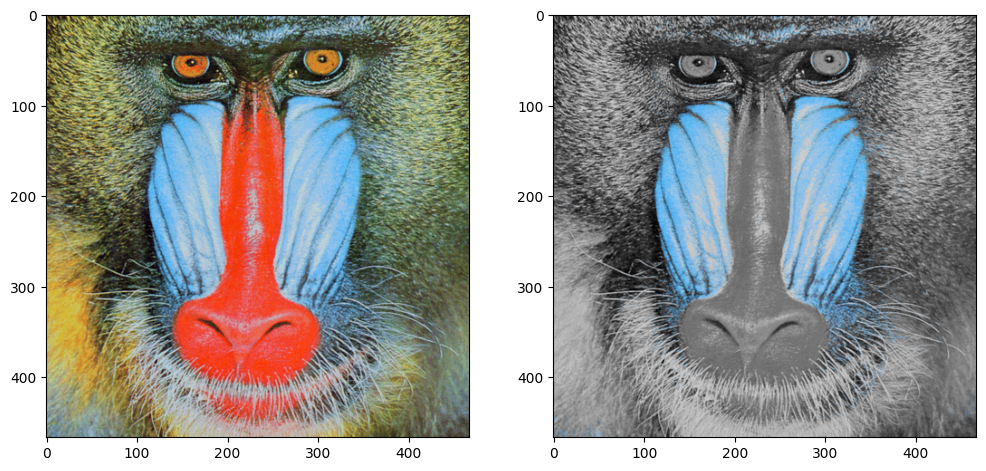

In [17]:
img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/imageM3.png')
img1 = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 50])  # Batas bawah warna biru
upper_blue = np.array([140, 255, 255])  # Batas atas warna biru
mask_blue = cv.inRange(img1, lower_blue, upper_blue)
mask_non_blue = cv.bitwise_not(mask_blue)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
blue = cv.bitwise_and(img, img, mask=mask_blue)
nonblue = cv.bitwise_and(gray_bgr, gray_bgr, mask=mask_non_blue)
final_image = cv.add(blue, nonblue)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))